In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

In [50]:
#importing dataset
final_data = pd.read_csv("HyperTuning_preprocessed_data(final)1.csv")

In [51]:
final_data.head(5)

Unnamed: 0  HR-0.0  HR-1.0  HR-2.0  HR-3.0  HR-4.0  HR-5.0  HR-6.0  HR-7.0  \
0        4452       1       0       0       0       0       0       0       0   
1        7305       0       0       0       1       0       0       0       0   
2        3574       1       0       0       0       0       0       0       0   
3        6640       1       0       0       0       0       0       0       0   
4         636       1       0       0       0       0       0       0       0   

   HR-8.0  ...  HTAG-3.0  HTAG-4.0  HTAG-5.0  HTHG-0.0  HTHG-1.0  HTHG-2.0  \
0       0  ...         0         0         0         1         0         0   
1       0  ...         0         0         0         1         0         0   
2       0  ...         0         0         0         1         0         0   
3       0  ...         0         0         0         1         0         0   
4       0  ...         0         0         0         1         0         0   

   HTHG-3.0  HTHG-4.0  HTHG-5.0  FTR  
0         0         0         0    2  
1         0         0         0    2  
2         0         0         0    2  
3         0         0         0    2  
4         0         0         0    2  

[5 rows x 6115 columns]

In [52]:
final_data = final_data.drop(['Unnamed: 0'], axis = 1)
final_data.head(5)

HR-0.0  HR-1.0  HR-2.0  HR-3.0  HR-4.0  HR-5.0  HR-6.0  HR-7.0  HR-8.0  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       1       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       1       0       0       0       0       0       0       0       0   
4       1       0       0       0       0       0       0       0       0   

   HR-9.0  ...  HTAG-3.0  HTAG-4.0  HTAG-5.0  HTHG-0.0  HTHG-1.0  HTHG-2.0  \
0       0  ...         0         0         0         1         0         0   
1       0  ...         0         0         0         1         0         0   
2       0  ...         0         0         0         1         0         0   
3       0  ...         0         0         0         1         0         0   
4       0  ...         0         0         0         1         0         0   

   HTHG-3.0  HTHG-4.0  HTHG-5.0  FTR  
0         0         0         0    2  
1         0         0         0    2  
2         0         0         0    2  
3         0         0         0    2  
4         0         0         0    2  

[5 rows x 6114 columns]

In [53]:
X = final_data.drop(['FTR'], axis=1)
Y = final_data['FTR']

In [54]:
X

HR-0.0  HR-1.0  HR-2.0  HR-3.0  HR-4.0  HR-5.0  HR-6.0  HR-7.0  HR-8.0  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       1       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          1       0       0       0       0       0       0       0       0   
4          1       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8995       1       0       0       0       0       0       0       0       0   
8996       1       0       0       0       0       0       0       0       0   
8997       1       0       0       0       0       0       0       0       0   
8998       1       0       0       0       0       0       0       0       0   
8999       1       0       0       0       0       0       0       0       0   

      HR-9.0  ...  HTAG-2.0  HTAG-3.0  HTAG-4.0  HTAG-5.0  HTHG-0.0  HTHG-1.0  \
0          0  ...         0         0         0         0         1         0   
1          0  ...         0         0         0         0         1         0   
2          0  ...         0         0         0         0         1         0   
3          0  ...         0         0         0         0         1         0   
4          0  ...         0         0         0         0         1         0   
...      ...  ...       ...       ...       ...       ...       ...       ...   
8995       0  ...         0         0         0         0         1         0   
8996       0  ...         0         1         0         0         0         1   
8997       0  ...         0         0         0         0         1         0   
8998       0  ...         0         0         0         0         1         0   
8999       0  ...         0         0         0         0         1         0   

      HTHG-2.0  HTHG-3.0  HTHG-4.0  HTHG-5.0  
0            0         0         0         0  
1            0         0         0         0  
2            0         0         0         0  
3            0         0         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
8995         0         0         0         0  
8996         0         0         0         0  
8997         0         0         0         0  
8998         0         0         0         0  
8999         0         0         0         0  

[9000 rows x 6113 columns]

In [55]:
Y

0       2
1       2
2       2
3       2
4       2
       ..
8995    0
8996    0
8997    0
8998    0
8999    0
Name: FTR, Length: 9000, dtype: int64

array([[<AxesSubplot:title={'center':'HR-0.0'}>,
        <AxesSubplot:title={'center':'HR-1.0'}>,
        <AxesSubplot:title={'center':'HR-2.0'}>, ...,
        <AxesSubplot:title={'center':'BWD-3.7'}>,
        <AxesSubplot:title={'center':'BWD-3.75'}>,
        <AxesSubplot:title={'center':'BWD-3.78'}>],
       [<AxesSubplot:title={'center':'BWD-3.8'}>,
        <AxesSubplot:title={'center':'BWD-3.85'}>,
        <AxesSubplot:title={'center':'BWD-3.9'}>, ...,
        <AxesSubplot:title={'center':'AR-3.0'}>,
        <AxesSubplot:title={'center':'AR-4.0'}>,
        <AxesSubplot:title={'center':'AR-5.0'}>],
       [<AxesSubplot:title={'center':'AR-6.0'}>,
        <AxesSubplot:title={'center':'AR-7.0'}>,
        <AxesSubplot:title={'center':'AR-8.0'}>, ...,
        <AxesSubplot:title={'center':'HY-19.0'}>,
        <AxesSubplot:title={'center':'HY-20.0'}>,
        <AxesSubplot:title={'center':'HY-21.0'}>],
       ...,
       [<AxesSubplot:title={'center':'IWH-1.45'}>,
        <AxesSubplot:titl

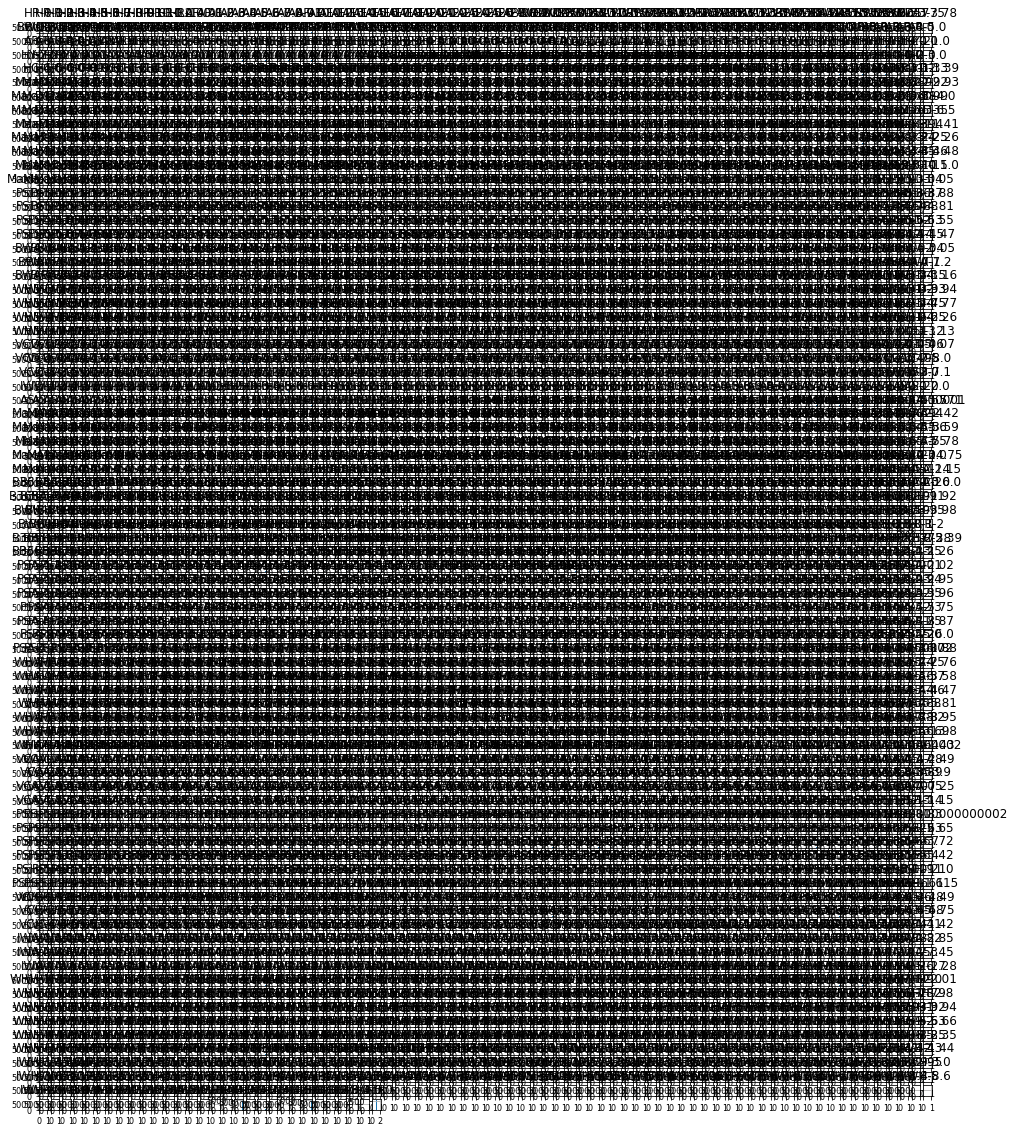

In [15]:
df_num = final_data.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [16]:
#X = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [35]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [38]:
X_principal

P1        P2
0     0.013111 -0.047388
1    -0.065178 -0.016149
2    -0.103450 -0.035310
3    -0.100016 -0.036751
4    -0.011379 -0.026659
...        ...       ...
8995  0.059312  0.222292
8996  0.251400 -0.079306
8997 -0.011249 -0.031179
8998  0.264401 -0.079750
8999 -0.065321 -0.022561

[9000 rows x 2 columns]

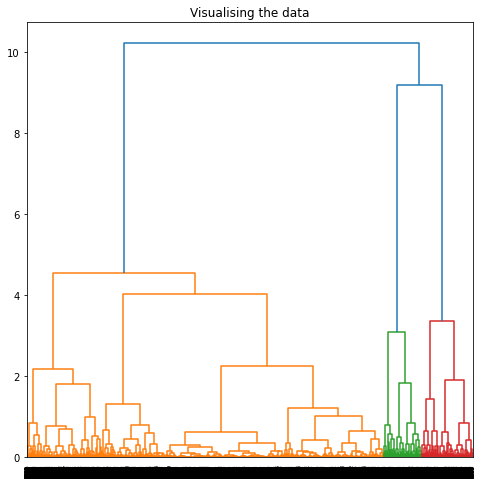

In [48]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

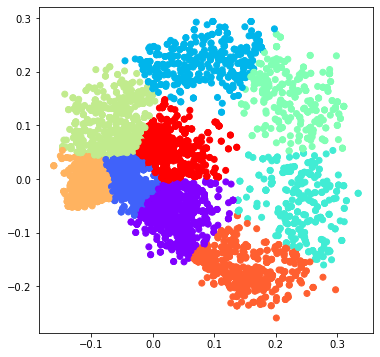

In [73]:
#with kmean
ac1 = KMeans(n_clusters = 9)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac1.fit_predict(X_principal), cmap ='rainbow')
plt.show()

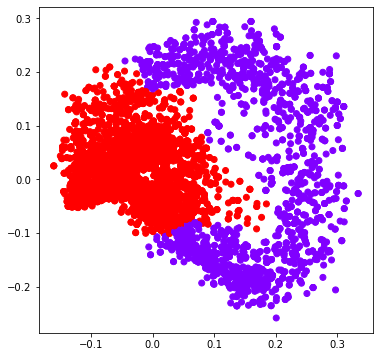

In [35]:
#with hierarchical clustering
ac2 = AgglomerativeClustering(n_clusters = 2)
c = ac2.fit_predict(X_principal)
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()
silhouette_score(X_principal, c)



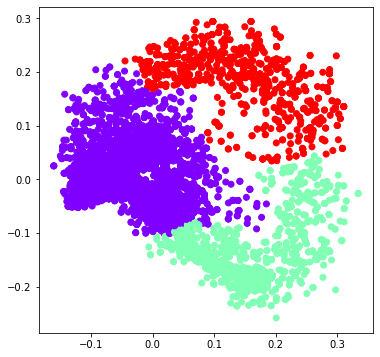

In [36]:
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()


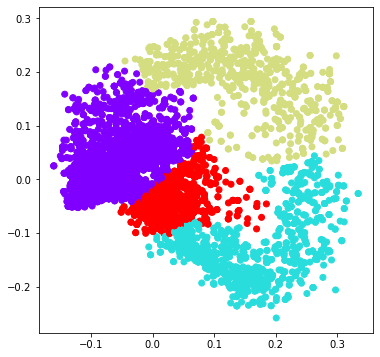

In [37]:
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

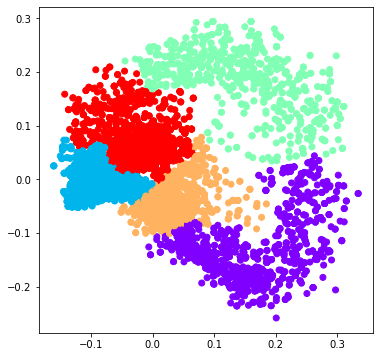

In [38]:
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

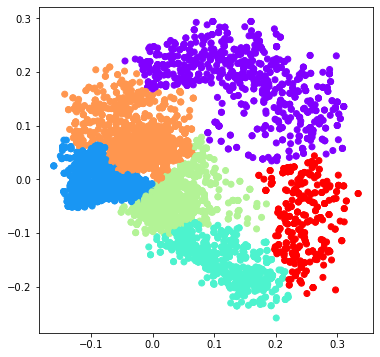

In [39]:
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

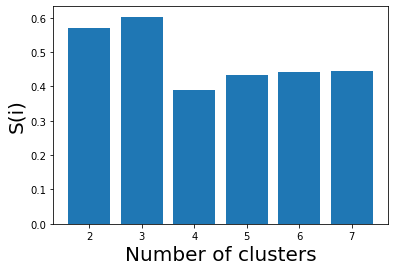

In [40]:
#silhouete with Agglomerative

k = [2, 3, 4, 5, 6, 7]

ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)
ac7 = AgglomerativeClustering(n_clusters = 7)

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac7.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [ ]:
#silhouete with K-mean

k = [2, 3, 4, 5, 6, 7]

ac2 = KMeans(n_clusters = 2)
ac3 = KMeans(n_clusters = 3)
ac4 = KMeans(n_clusters = 4)
ac5 = KMeans(n_clusters = 5)
ac6 = KMeans(n_clusters = 6)
ac7 = KMeans(n_clusters = 7)

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac7.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [37]:
def make_generator(parameters):
    if not parameters:
        yield dict()
    else:
        key_to_iterate = list(parameters.keys())[0]
        next_round_parameters = {p : parameters[p]
                    for p in parameters if p != key_to_iterate}
        for val in parameters[key_to_iterate]:
            for pars in make_generator(next_round_parameters):
                temp_res = pars
                temp_res[key_to_iterate] = val
                yield temp_res

# add fix parameters - here - it's just a random one
fixed_params = {"max_iter":300 } 

param_grid = {"n_clusters": range(2, 32,3)}


distortions = []
inertias = []
silhouette = []
mapping1 = {}
mapping2 = {}

for params in make_generator(param_grid):
    params.update(fixed_params)
    print(params)
    ca = KMeans( **params )
    ca.fit(X)
    labels = ca.labels_
    distortions.append(sum(np.min(cdist(X, ca.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(ca.inertia_)
    silhouette.append(silhouette_score(X, labels))
 
    mapping1[params['n_clusters']] = sum(np.min(cdist(X, ca.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[params['n_clusters']] = ca.inertia_

{'n_clusters': 2, 'max_iter': 300}
{'n_clusters': 5, 'max_iter': 300}
{'n_clusters': 8, 'max_iter': 300}
{'n_clusters': 11, 'max_iter': 300}
{'n_clusters': 14, 'max_iter': 300}
{'n_clusters': 17, 'max_iter': 300}
{'n_clusters': 20, 'max_iter': 300}
{'n_clusters': 23, 'max_iter': 300}
{'n_clusters': 26, 'max_iter': 300}
{'n_clusters': 29, 'max_iter': 300}
{'n_clusters': 32, 'max_iter': 300}


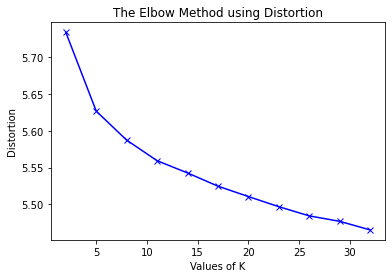

In [39]:
plt.plot(range(2,33,3), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

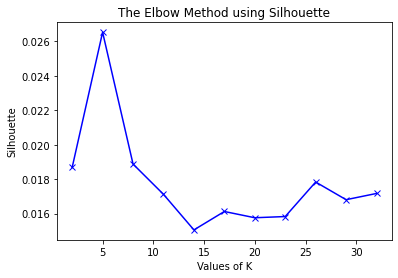

In [40]:
plt.plot(range(2,33,3), silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette')
plt.title('The Elbow Method using Silhouette')
plt.show()


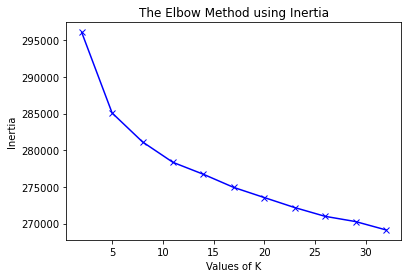

In [41]:
plt.plot(range(2,33,3), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [101]:
ca = KMeans( n_clusters=17, max_iter=200 )
X = X.dropna()
ca.fit(X)
labels = ca.labels_
X['labels'] = labels

X.labels.value_counts()

13    1089
1      926
5      737
0      710
6      639
12     621
4      550
2      545
11     519
9      389
15     369
10     362
7      351
8      349
3      307
16     279
14     258
Name: labels, dtype: int64

<AxesSubplot:>

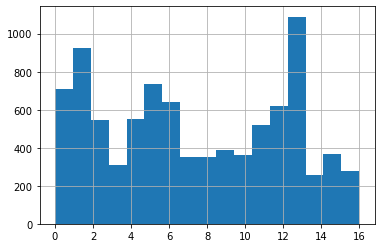

In [102]:
X.labels.hist(bins=17)

In [103]:
def compare_cluster(label_x, label_y):
    left = X[X['labels']==label_x].mean().reset_index()
    right = X[X['labels']==label_y].mean().reset_index()
    both = left.merge(right, on='index',how='inner').reset_index()
    both.columns = [''.join(tup).rstrip('_') for tup in both.columns.values]
    both = both.iloc[:,1:]
    both = both.rename(columns={'0_x':'cluster_'+ str(label_x), '0_y':'cluster_' + str(label_y)})
    both['difference'] = abs(both['cluster_'+ str(label_x)] - both['cluster_'+ str(label_y)])
    return both[both['difference']>=1]

compare_cluster(1, 10)

index  cluster_1  cluster_10  difference
6113  labels        1.0        10.0         9.0

In [104]:
compare_cluster(12, 0)

index  cluster_12  cluster_0  difference
6113  labels        12.0        0.0        12.0

In [105]:
compare_cluster(7, 8)

index  cluster_7  cluster_8  difference
6113  labels        7.0        8.0         1.0

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Fouls Frequency")
sns.axes_style("dark")
sns.violinplot(y=X["AF"])
sns.violinplot(y=X["HF"])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Fouls Frequency")
sns.axes_style("dark")
sns.violinplot(y=X[X['labels']==1]["AF"])
sns.violinplot(y=X[X['labels']==10]["HF"])
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter( X["HS"][X.labels == 10], X["AS"][X.labels == 10], c='blue', s=60)
ax.scatter( X["HS"][X.labels == 1], X["AS"][X.labels == 1], c='red', s=60)
# ax.view_init(30, 185)
plt.ylabel("AS")
plt.xlabel("HS")
# ax.set_zlabel('AF')
plt.show()

In [110]:
#with PCA X_principal
no_of_clusters = range(2,20)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state = 2)
    kmeans = kmeans.fit(X_principal)
    u = kmeans.inertia_
    inertia.append(u)
    print("The insertia for :",f," Clusters is :",u)

The insertia for : 2  Clusters is : 86.79780191525343
The insertia for : 3  Clusters is : 48.096674548600525
The insertia for : 4  Clusters is : 37.64943187311713
The insertia for : 5  Clusters is : 28.17288360631264
The insertia for : 6  Clusters is : 22.792089808766086
The insertia for : 7  Clusters is : 19.67784837420507
The insertia for : 8  Clusters is : 16.91676211260421
The insertia for : 9  Clusters is : 14.660209539813234
The insertia for : 10  Clusters is : 12.89741104293039
The insertia for : 11  Clusters is : 11.491750558325279
The insertia for : 12  Clusters is : 10.529215753455249
The insertia for : 13  Clusters is : 9.647016481258072
The insertia for : 14  Clusters is : 8.87166474501093
The insertia for : 15  Clusters is : 8.272771849189967
The insertia for : 16  Clusters is : 7.736997822657422
The insertia for : 17  Clusters is : 7.312629428340054
The insertia for : 18  Clusters is : 6.997939080370784
The insertia for : 19  Clusters is : 6.597796365323327


Text(0.5, 1.0, 'Elbow Method')

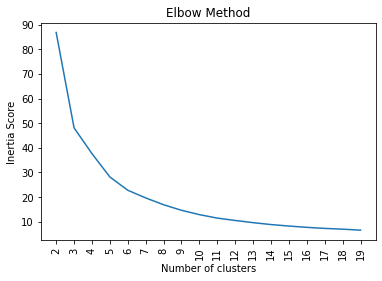

In [111]:
fig, (ax1) = plt.subplots(1)
xx = np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = 'vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow Method')

In [17]:
#with X (without PCA) 
no_of_clusters = range(2,20)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state = 2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The insertia for :",f," Clusters is :",u)

The insertia for : 2  Clusters is : 296095.64715839014
The insertia for : 3  Clusters is : 291418.662555006
The insertia for : 4  Clusters is : 288769.2768593081
The insertia for : 5  Clusters is : 285082.14257149503
The insertia for : 6  Clusters is : 283446.3283911869
The insertia for : 7  Clusters is : 282246.2250148506
The insertia for : 8  Clusters is : 281243.0294500099
The insertia for : 9  Clusters is : 279899.6656794567
The insertia for : 10  Clusters is : 279143.7321211587
The insertia for : 11  Clusters is : 278579.0357881133
The insertia for : 12  Clusters is : 277943.38249943947
The insertia for : 13  Clusters is : 277346.81921039487
The insertia for : 14  Clusters is : 276670.31790492573
The insertia for : 15  Clusters is : 276331.2758527868
The insertia for : 16  Clusters is : 275533.0886581538
The insertia for : 17  Clusters is : 275149.52378798206
The insertia for : 18  Clusters is : 274725.575965037
The insertia for : 19  Clusters is : 274060.389234025


Text(0.5, 1.0, 'Elbow Method')

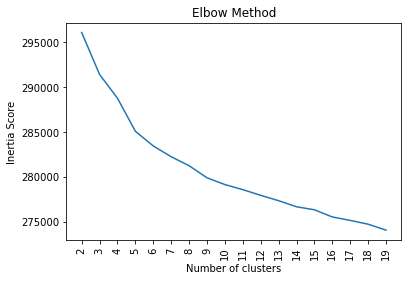

In [24]:
fig, (ax1) = plt.subplots(1)
xx = np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = 'vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow Method')

In [170]:
#with PCA
kmeans = KMeans(n_clusters=5,random_state=2)
kmeans = kmeans.fit(X_principal)

kmeans.labels_

predictions = kmeans.predict(X_principal)
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

countscldf = pd.DataFrame(counts, columns = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"])
countscldf

Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
0       1582       4805        654        798       1161

In [171]:
predictions

array([0, 1, 1, ..., 0, 3, 1])

In [172]:
kmeans.labels_

array([0, 1, 1, ..., 0, 3, 1])

In [160]:
#without PCA
kmeans = KMeans(n_clusters=9,random_state=2)
kmeans = kmeans.fit(X)

kmeans.labels_

predictions = kmeans.predict(X)
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,9)

countscldf = pd.DataFrame(counts)
countscldf

0     1    2    3    4     5     6     7    8
0  990  1140  926  648  710  1402  1347  1100  737

In [161]:
predictions

array([1, 8, 7, ..., 4, 7, 6])

In [162]:
kmeans.labels_

array([1, 8, 7, ..., 4, 7, 6])

In [113]:
# Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create range of clusters 
cluster_ranges = list(range(2,20)); cluster_ranges

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

For n_clusters = 2 The average silhouette_score is : 0.5776183988294769
For n_clusters = 3 The average silhouette_score is : 0.5931286492834295
For n_clusters = 4 The average silhouette_score is : 0.4963511975155923
For n_clusters = 5 The average silhouette_score is : 0.4789692381969754
For n_clusters = 6 The average silhouette_score is : 0.48060944951668827
For n_clusters = 7 The average silhouette_score is : 0.41832549421398146
For n_clusters = 8 The average silhouette_score is : 0.4207379453984743
For n_clusters = 9 The average silhouette_score is : 0.43766239276055474
For n_clusters = 10 The average silhouette_score is : 0.4422099253245079
For n_clusters = 11 The average silhouette_score is : 0.43990988191332253
For n_clusters = 12 The average silhouette_score is : 0.4364162567373507
For n_clusters = 13 The average silhouette_score is : 0.43908473963104233
For n_clusters = 14 The average silhouette_score is : 0.4450693536962628
For n_clusters = 15 The average silhouette_score is : 

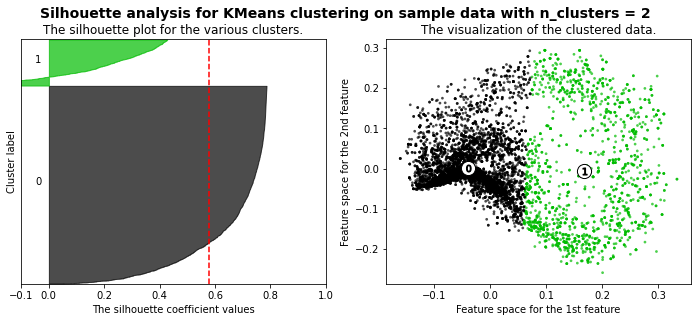

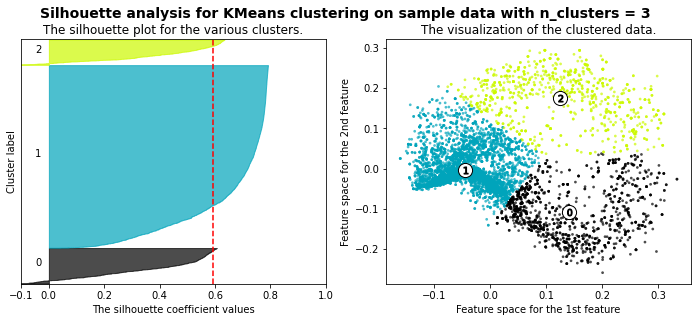

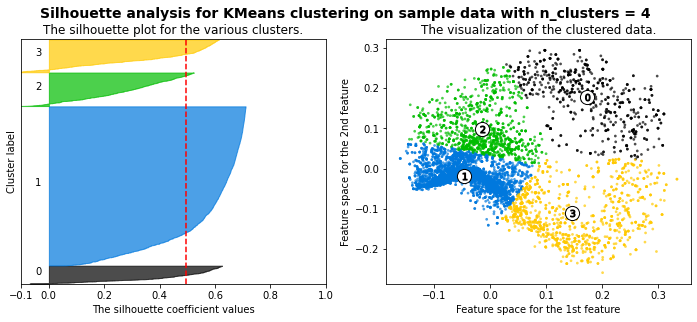

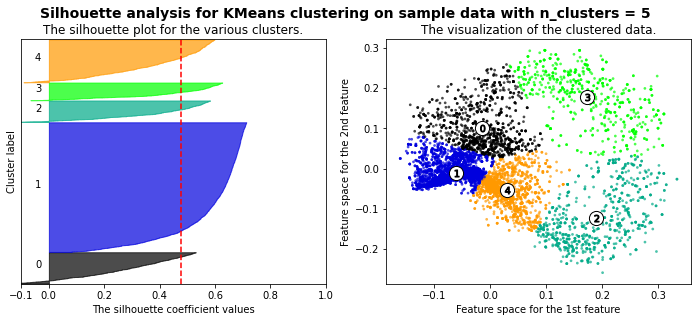

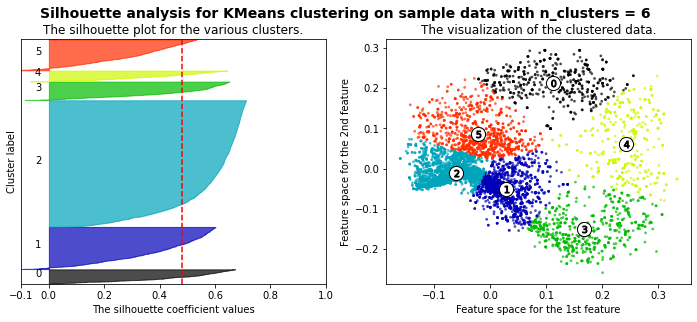

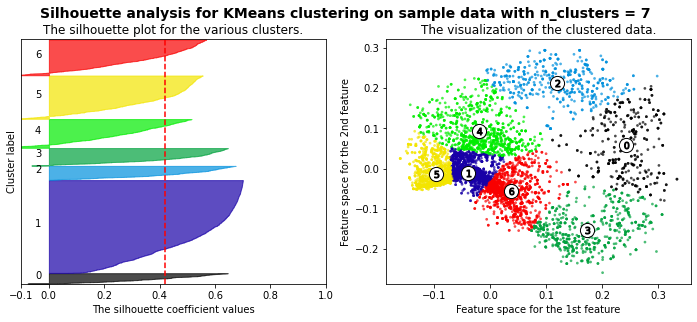

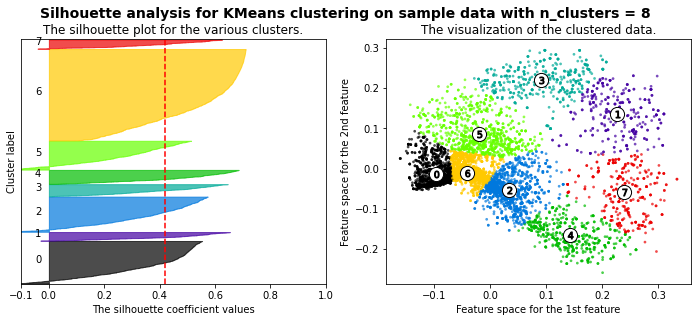

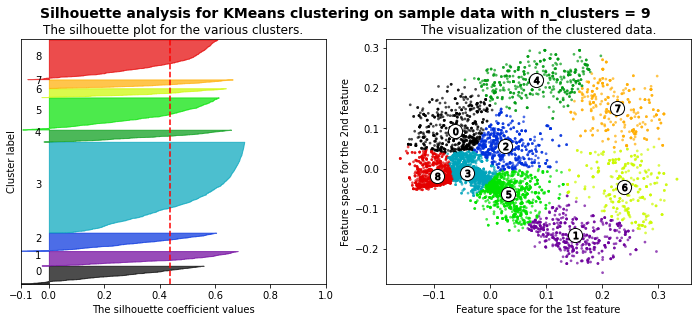

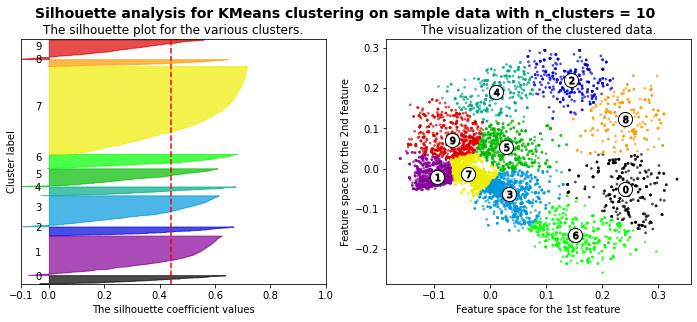

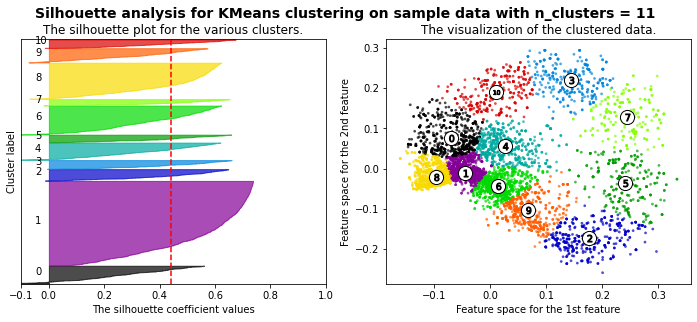

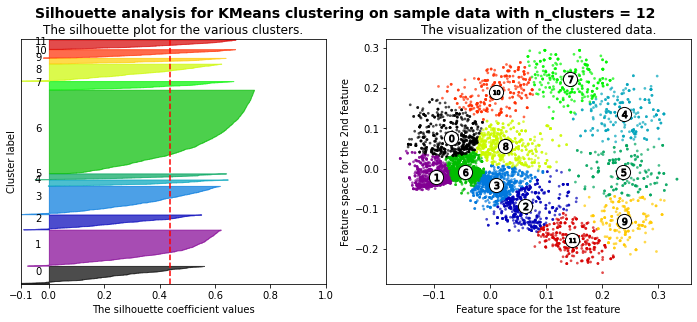

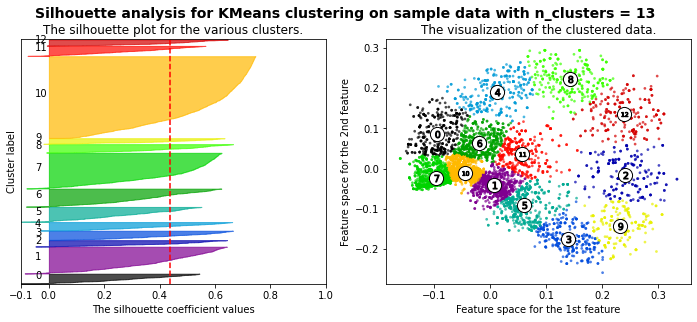

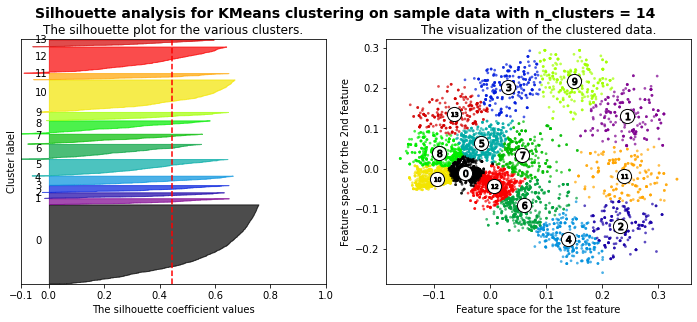

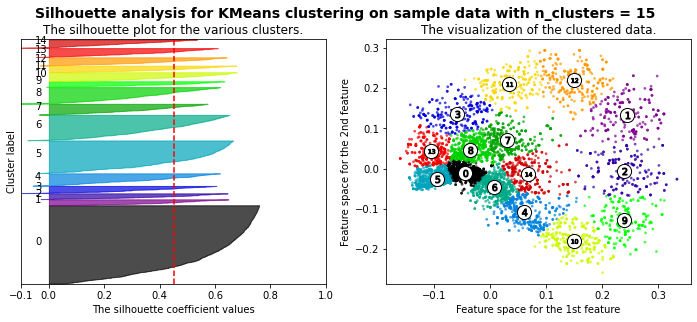

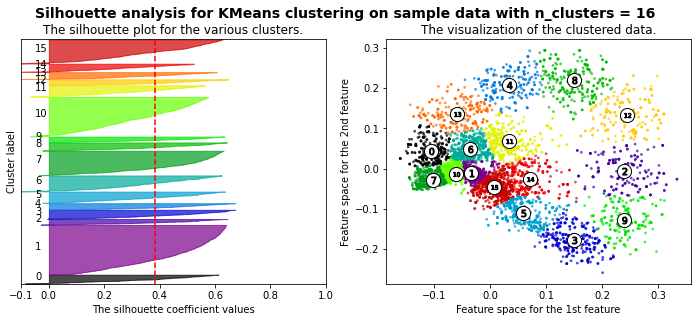

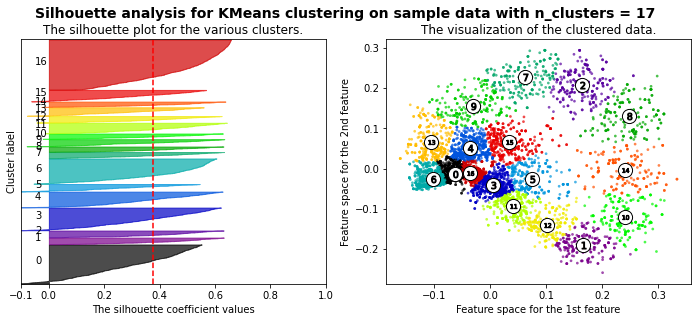

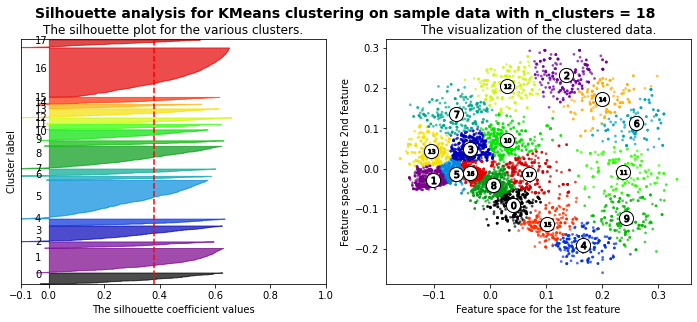

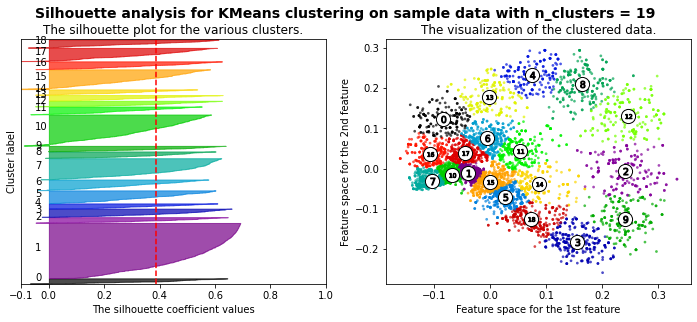

In [121]:
#with PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
silhouette_scores = []
for n_clusters in cluster_ranges:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_principal) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_principal)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    silhouette_avg = silhouette_score(X_principal, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_principal, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_principal['P1'], X_principal['P2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

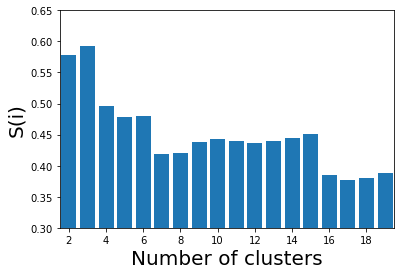

In [156]:
# Plotting a bar graph to compare the results
plt.bar(cluster_ranges, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.ylim(0.3,0.65)
plt.xlim(1.5, 19.5)
plt.show()